 Objective: 
           When one thinks about prestige in the filmmaking industry, the Academy Awards always come to mind. That being said, there are often always Oscar favorites, that are pegged to be sure winners from the get go. The purpose of this project is to explore the different correlations between films that are Oscar recipients, to see if there is indeed a particular  make an Oscar winning movie.
           
 Datasets: 
           IMDB Top 5000 Movies
           The Academy Awards 1925-2015

In [14]:
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from IPython.display import Image

Firstly, I cleaned up the data from both csv-s, taking out the data I wanted to explore and merging the two.

In [15]:
#oscars dataset from 1927-2015
oscars = pd.read_csv('database.csv')
#imdb top 5000 dataset
imdb = pd.read_csv('movie_metadata.csv', encoding = "ISO-8859-1")

In [16]:
#film names had two junk characters appended at the end-cleaned up
imdb['Film'] = imdb['Film'].str[:-2]

In [17]:
#picked pertinent selectors for both datasets
imdb = imdb[['director_name', 'Film', 'gross', 'genres', 'duration', 'plot_keywords']]
oscars = oscars[['Year', 'Award', 'Name', 'Film']]

In [18]:
#used film name to merge the two datasets
joined = pd.merge(imdb, oscars, on="Film")

In [19]:
dropped_df = joined.dropna()

dropped_df.head()


,director_name,Film,gross,genres,duration,plot_keywords,Year,Award,Name
0,James Cameron,Titanic,658672302.0,Drama|Romance,194.0,artist|love|ship|titanic|wet,1997,Actress in a Leading Role,Kate Winslet
1,James Cameron,Titanic,658672302.0,Drama|Romance,194.0,artist|love|ship|titanic|wet,1997,Actress in a Supporting Role,Gloria Stuart
2,Christopher Nolan,The Dark Knight,533316061.0,Action|Crime|Drama|Thriller,152.0,based on comic book|dc comics|psychopath|star ...,2008,Actor in a Supporting Role,Heath Ledger
3,David Fincher,The Curious Case of Benjamin Button,127490802.0,Drama|Fantasy|Romance,166.0,deformed baby|diary|lingerie slip|older man yo...,2008,Actor in a Leading Role,Brad Pitt
4,David Fincher,The Curious Case of Benjamin Button,127490802.0,Drama|Fantasy|Romance,166.0,deformed baby|diary|lingerie slip|older man yo...,2008,Actress in a Supporting Role,Taraji P. Henson


I then explored the possbility if a particular genre of film might be more likely to nab an award. The common misconception is that Oscars are categorized by genre. However, this is untrue. They are in fact categorized by roles in the film ( Actor, Music Score, etc ) or by category ( Independant Film, Documentary, etc ). 

The visualization below is a word cloud with all the genres of the Oscar winning films with size based on the frequency of that given drama. The data set presented the genres for the films with a string of subgenres which leads to the majority of genre strings being unique, skewing the word cloud.

Therefore, I decided to split the genre strings up and find the word frequencies for every individual genre.

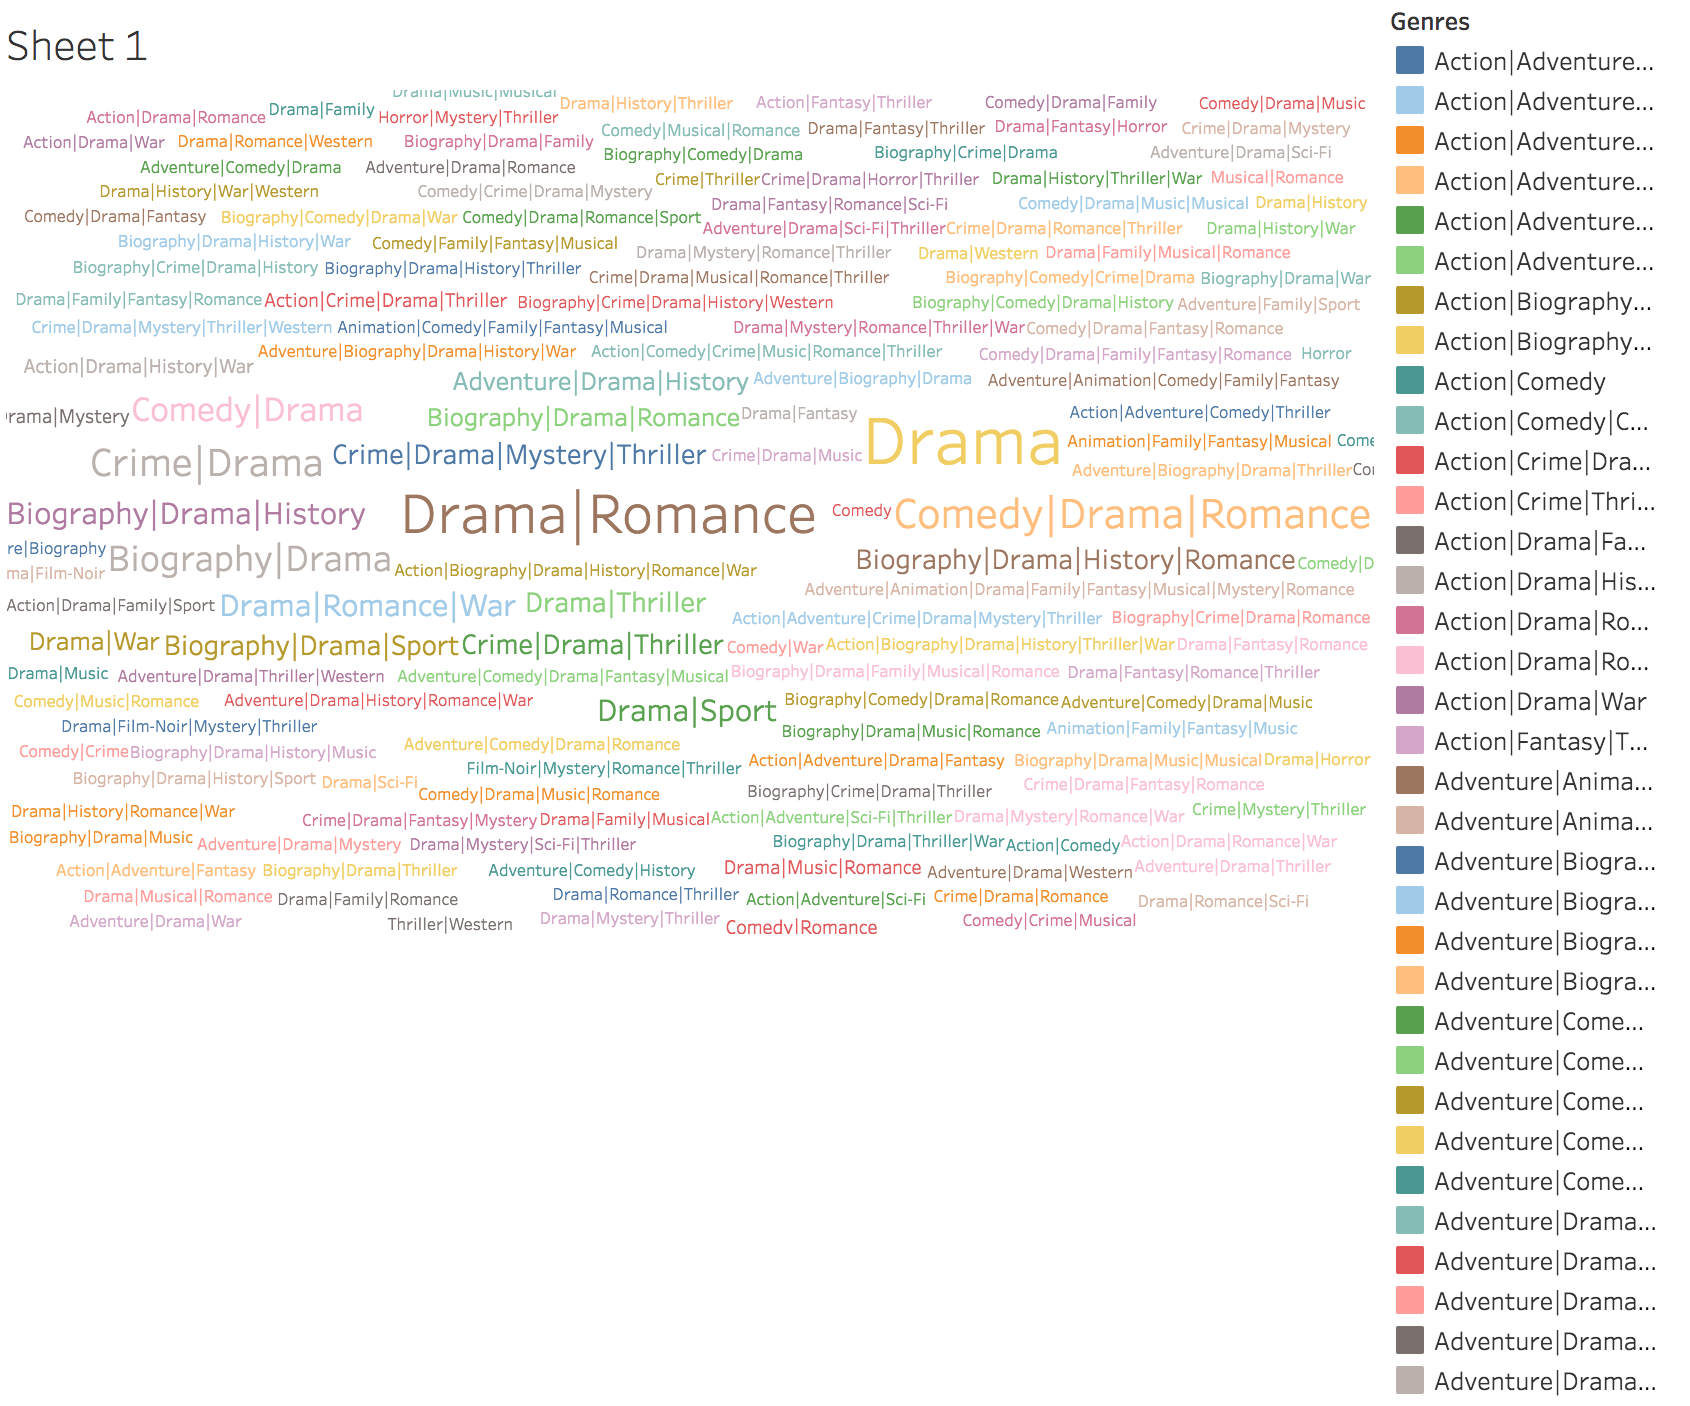

In [20]:
Image( filename = 'vis2.png' )

The full visualization can be seen here:

https://public.tableau.com/views/Attempt1_14/Sheet1?:embed=y&:display_count=yes

In [21]:
#clean up film genres
genres = []
for row in joined['genres']:
   genres.extend(row.split('|'))


Splitting up the genres presented a more pertinant slice of the data. Drama proved to be a clear winner in terms of frequency. This could be due to many reasons. By definition, drama is: 

" [a] composition in verse or prose intended to portray life or character or to tell a story usually involving conflicts and emotions through action and dialogue and typically designed for theatrical performance "

This can practically be attributed with any film, leading to it being included in almost every genre string.

Therefore, I decided that we should examine the other most frequent genres as well in order to get a more accurate perception of the most popular genres that win the Oscars.

The second most frequent drama was Romance with 224 hits.

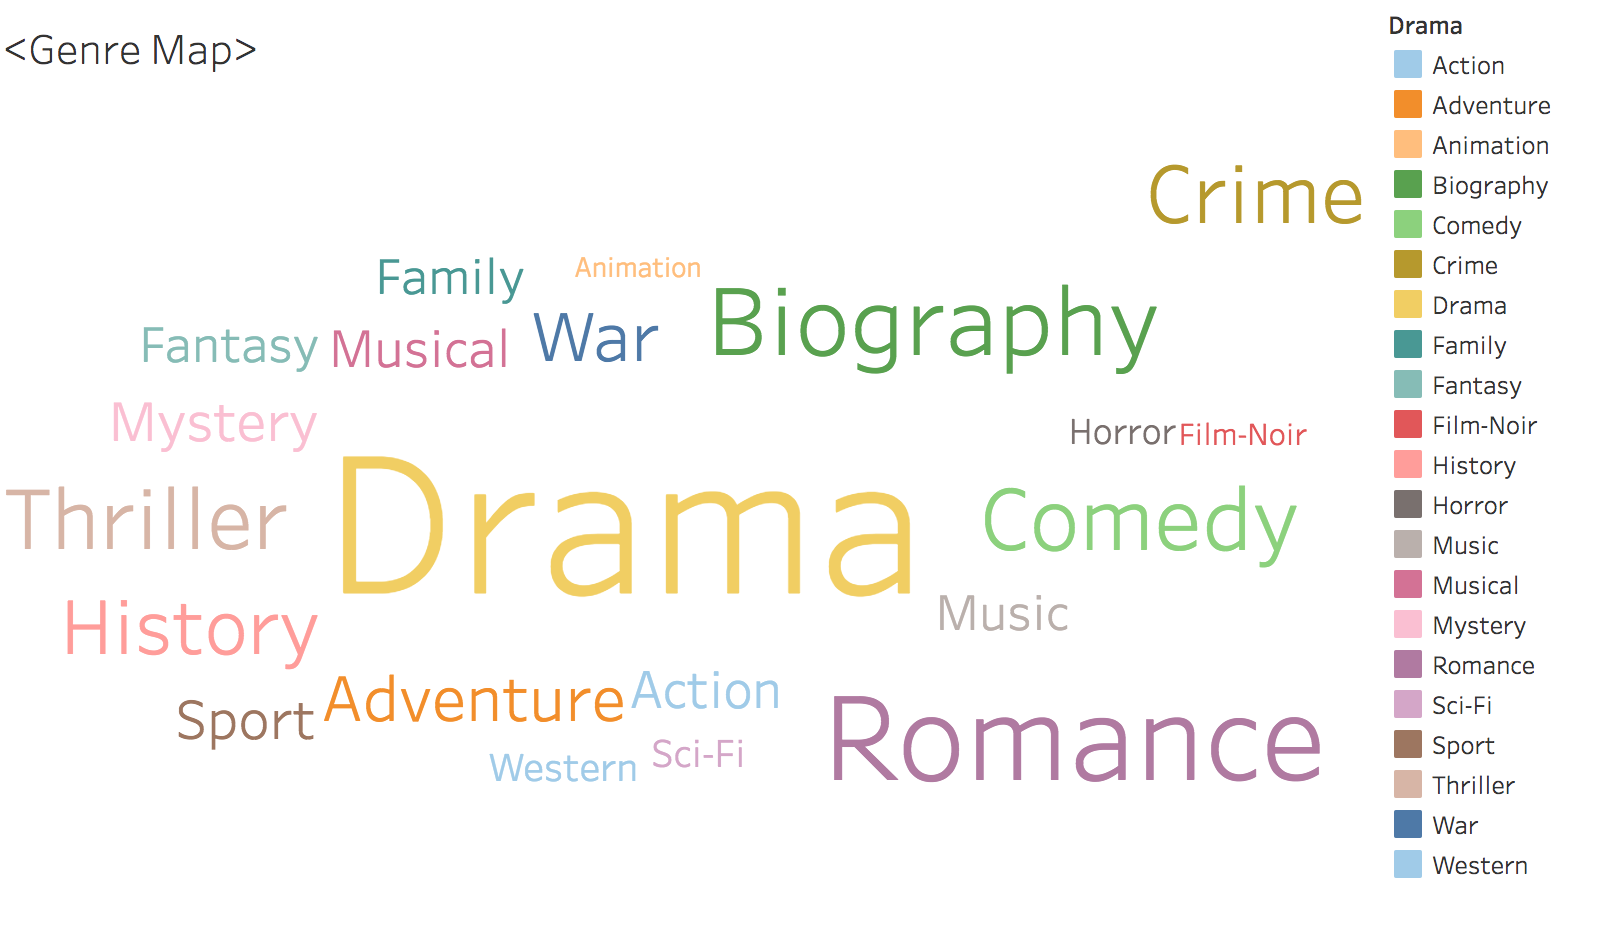

In [13]:
Image( filename = 'vis1.png' )

The full visualization can be seen here:
    https://public.tableau.com/profile/joanne6443#!/vizhome/Genre_Map/Sheet2

In [3]:
plot_words = []

non_null = joined[joined['plot_keywords'].notnull()]
for plot_word in non_null['plot_keywords']:
   plot_words.extend(plot_word.split('|'))

plot_words.to_csv( 'plot_words.csv' )  
#key_word.to_csv('key_words.csv')

NameError: name 'joined' is not defined